## <font color = blue>Problem Statement:
    
**<font color = purple>The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.**


### <font color = blue>Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### <font color = blue>Reading data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <font color = blue>Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (891, 12)


### <font color = blue> Checking for Null values

In [4]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----------------------


### <font color = blue> Information about dataset

In [5]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----------------------------------------------------


#### <font color = green>There is Sex, Name, Ticket, Cabin and Embarked feature which is object type we have convert into int.

### <font color = blue>Droping Unwanted Column

In [6]:
col = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [7]:
df = df.drop(columns = col, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### <font color = green> We drop Cabin because it has more than 50% data is missing or other words more than 50% NaN present. 

### <font color = blue>Handling missing data

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
# check nan remove or not
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### <font color = green>NaN removed from our dataset.

### <font color = blue>Relation feature and feature

In [10]:
s = df['Survived'].value_counts()
s

0    549
1    342
Name: Survived, dtype: int64

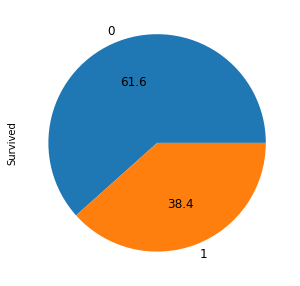

In [11]:
s.plot.pie( fontsize = 12, autopct = '%.1f',figsize = (10,5))
plt.show()

#### <font color = green>Observation : 61.6% people died and 38.4% people survived.

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
print('-------------------------------------')
print(df.groupby('Pclass')['Survived'].sum())
print('-------------------------------------')

-------------------------------------
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
-------------------------------------


In [14]:
p = df.groupby('Pclass')['Survived'].sum()

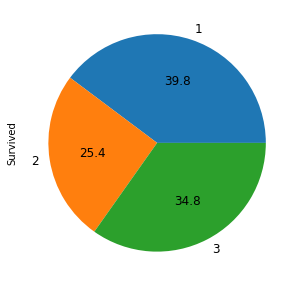

In [15]:
p.plot.pie( fontsize = 12, autopct = '%.1f',figsize = (10,5))
plt.show()

#### <font color = green>Observation : 1st class passanger Survived more compare to other class and 2nd class passanger Survived least.

In [16]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [17]:
print('-------------------------------------')
print(df.groupby('Pclass')['Fare'].sum())
print('-------------------------------------')

-------------------------------------
Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64
-------------------------------------


In [18]:
f = df.groupby('Pclass')['Fare'].sum()

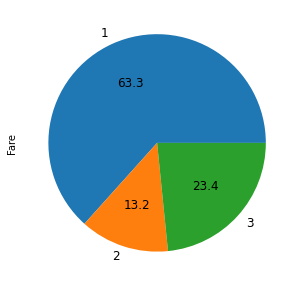

In [19]:
f.plot.pie( fontsize = 12, autopct = '%.1f',figsize = (10,5))
plt.show()

#### <font color = green>Observation : 1st class passanger spent more on tickets.

In [20]:
df['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
74.00      1
0.92       1
70.50      1
12.00      1
Name: Age, Length: 88, dtype: int64

In [21]:
print('-------------------------------------')
print(df.groupby('Age')['Survived'].sum())
print('-------------------------------------')

-------------------------------------
Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 88, dtype: int64
-------------------------------------


In [22]:
a = df.groupby('Age')['Survived'].sum()

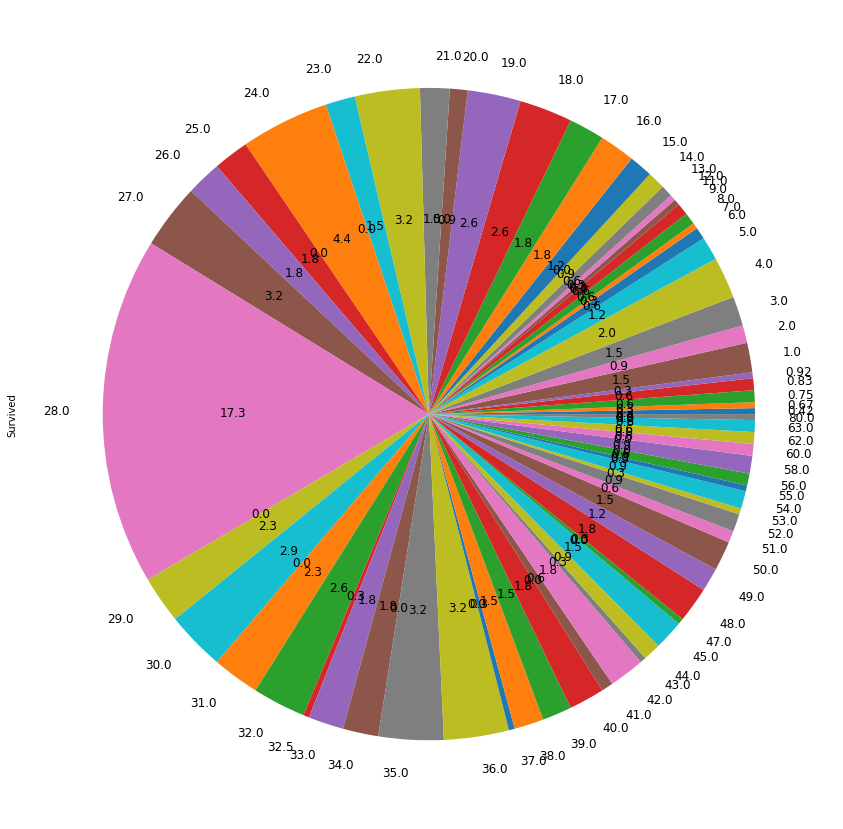

In [23]:
a.plot.pie( fontsize = 12, autopct = '%.1f',figsize = (20,15))
plt.show()

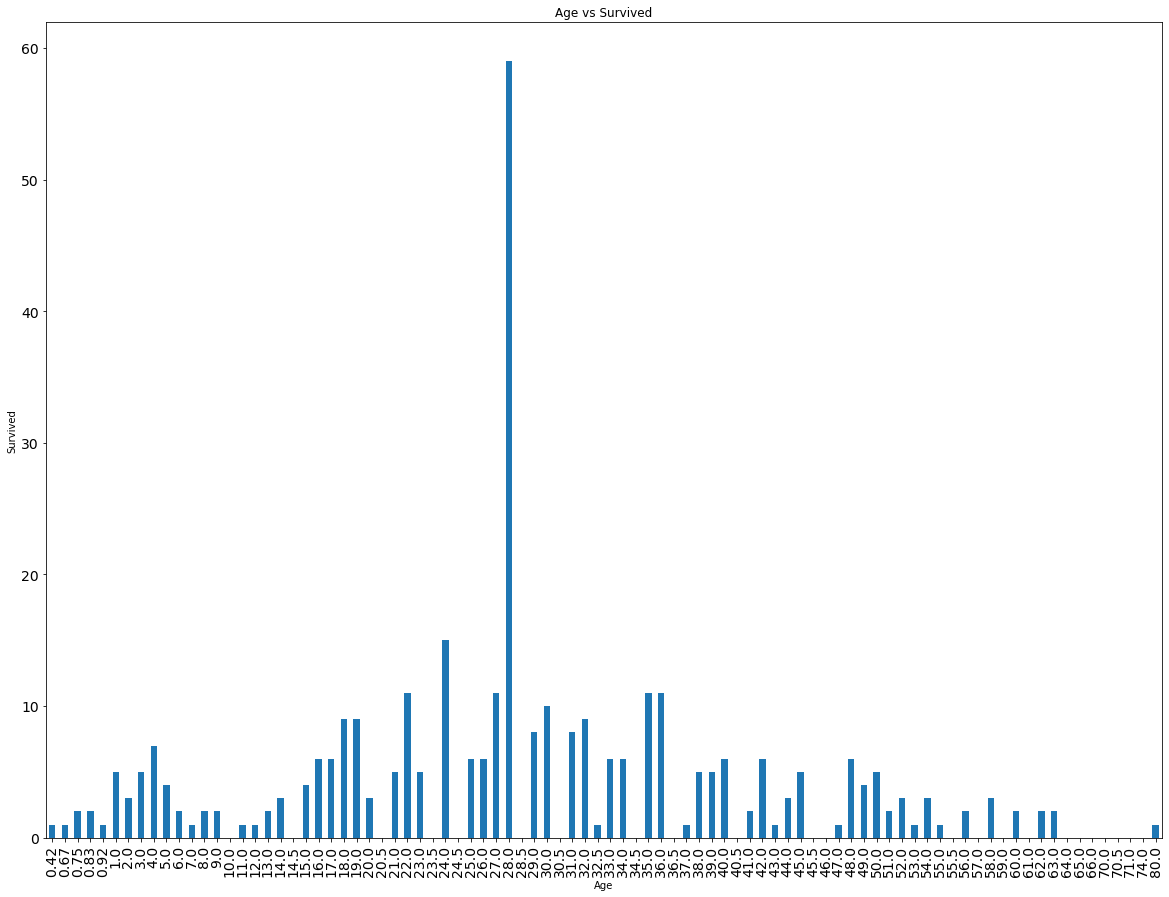

In [24]:
a.plot.bar(figsize = (20,15), fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age vs Survived')
plt.show()

#### <font color = green>Observation :Above both plot shows age group of 24 and 36 is more  Survived.

### <font color = blue>Checking for Imbalance Label

In [25]:
print('-----------------------------------')
print('No of Survived present in Titanic :')
print('-----------------------------------')
print(df['Survived'].value_counts())
print('-----------------------------------')

-----------------------------------
No of Survived present in Titanic :
-----------------------------------
0    549
1    342
Name: Survived, dtype: int64
-----------------------------------


#### <font color = green>Observation : Class is balanced.

### <font color=blue>Label Encoder

In [26]:
lab_enc = LabelEncoder()
df['Sex'] = lab_enc.fit_transform(df['Sex'])

In [27]:
lab_enc = LabelEncoder()
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


#### <font color=green> Converting categorical into numrical value is done.

### <font color= blue>Statistic of Dataset

In [71]:
# We use describe command to extracte statistical infomation about dataset.
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### <font color=blue> Plot how data is distributed

---------------------
Distribution Plot :- 
---------------------


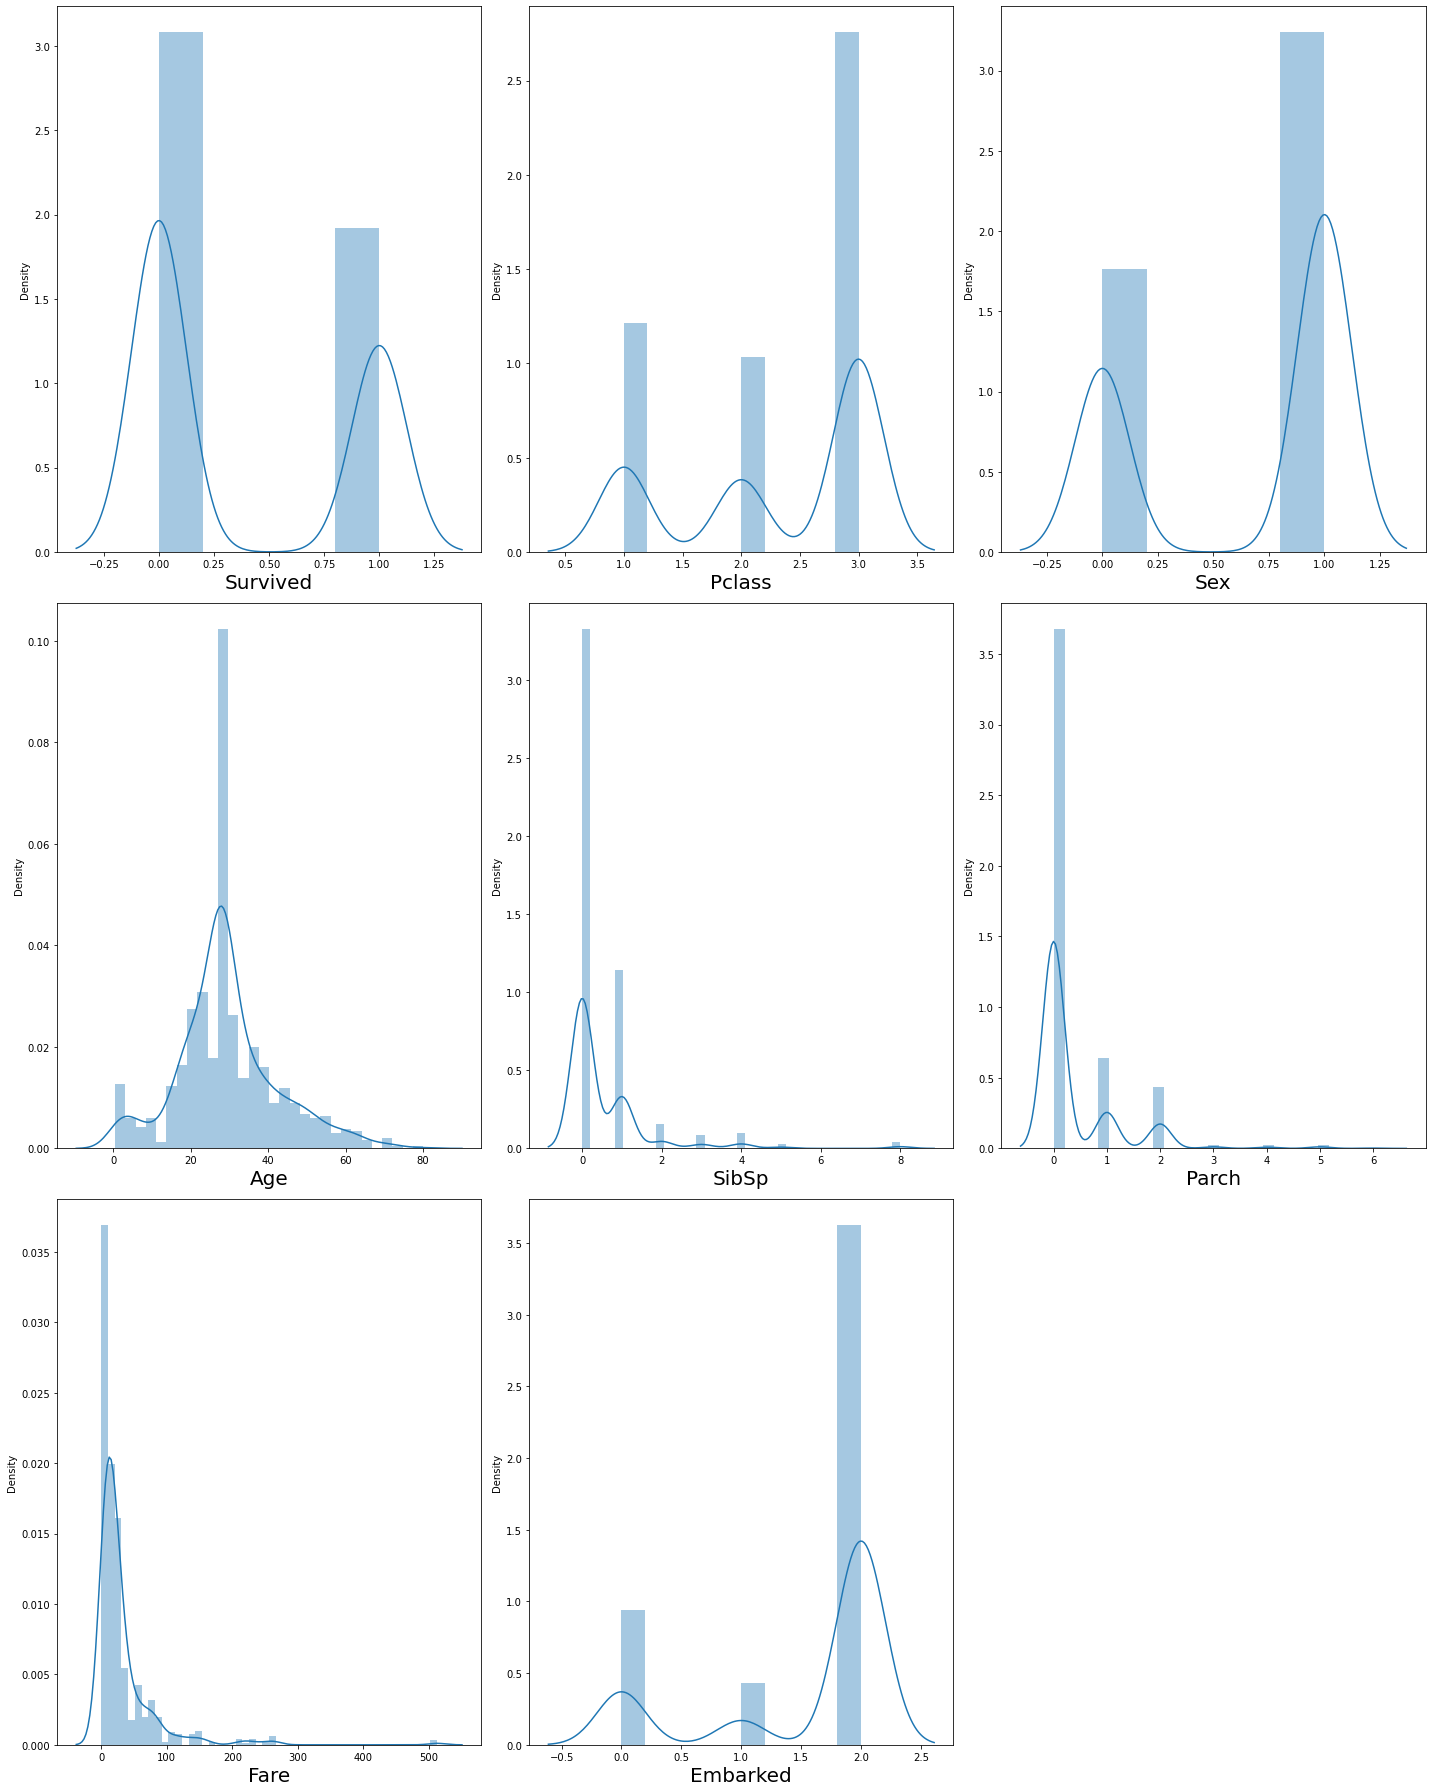

In [30]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### <font color = green>Observation :Above both plot shows their is no  outliers.

### <font color = blue>Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


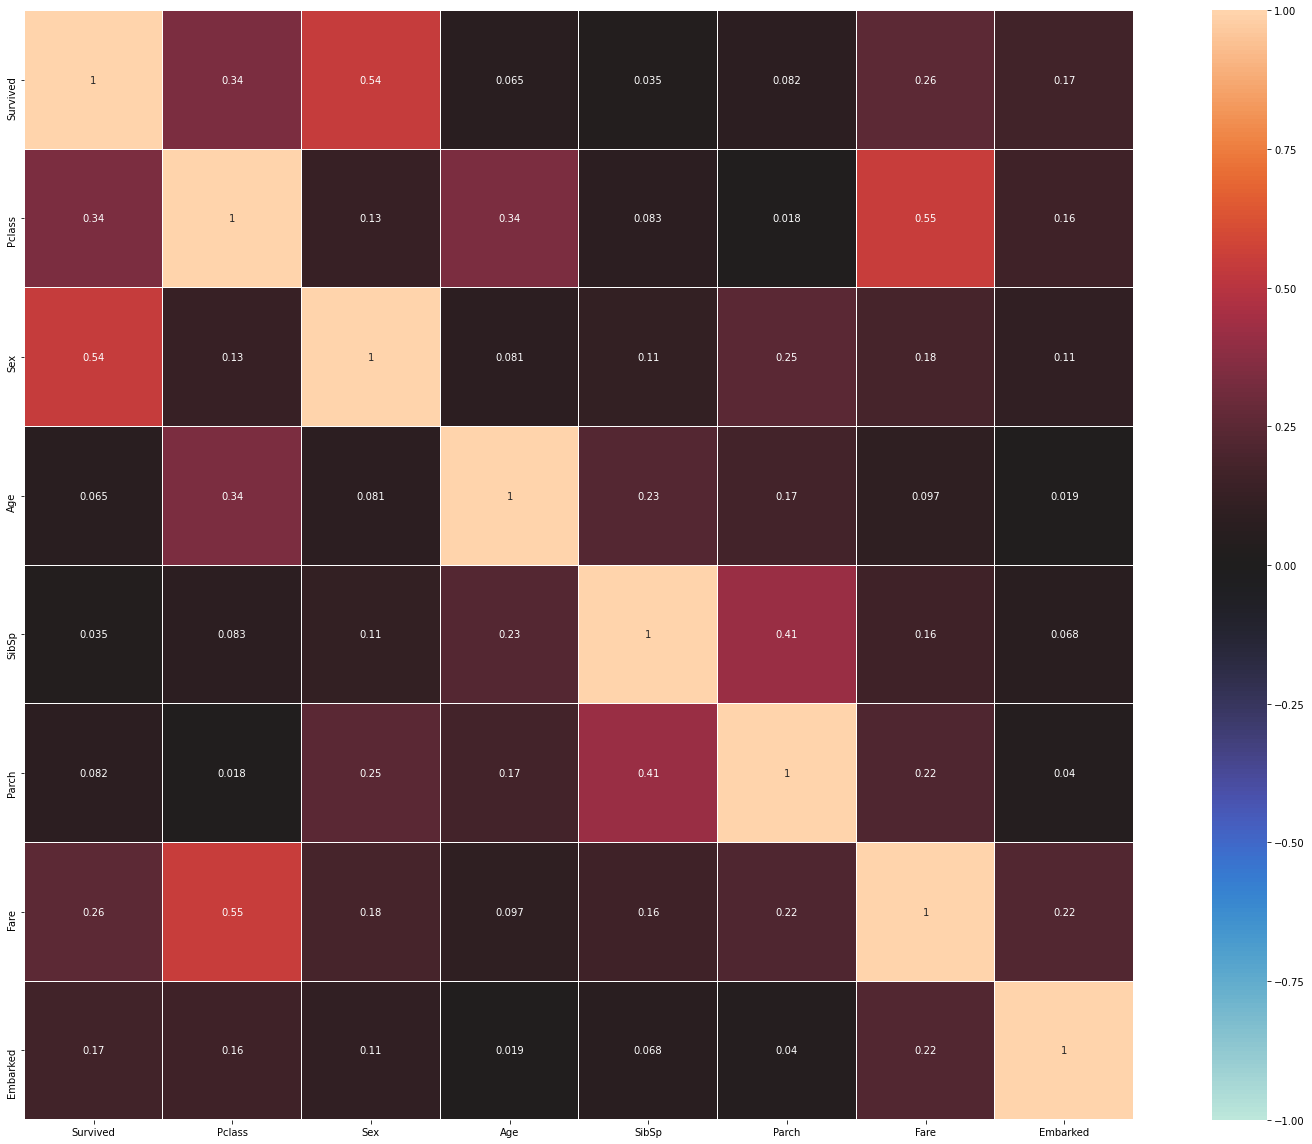

In [31]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### <font color = green>Observation : Pclass and Fare show maximum relation.

### <font color = blue> Spliting Dataset into features and labels

In [32]:
x = df.drop('Survived', axis = 1)
y = df.Survived
print('Data has been splited')

Data has been splited


------------------------
Distribution Plot :-
------------------------


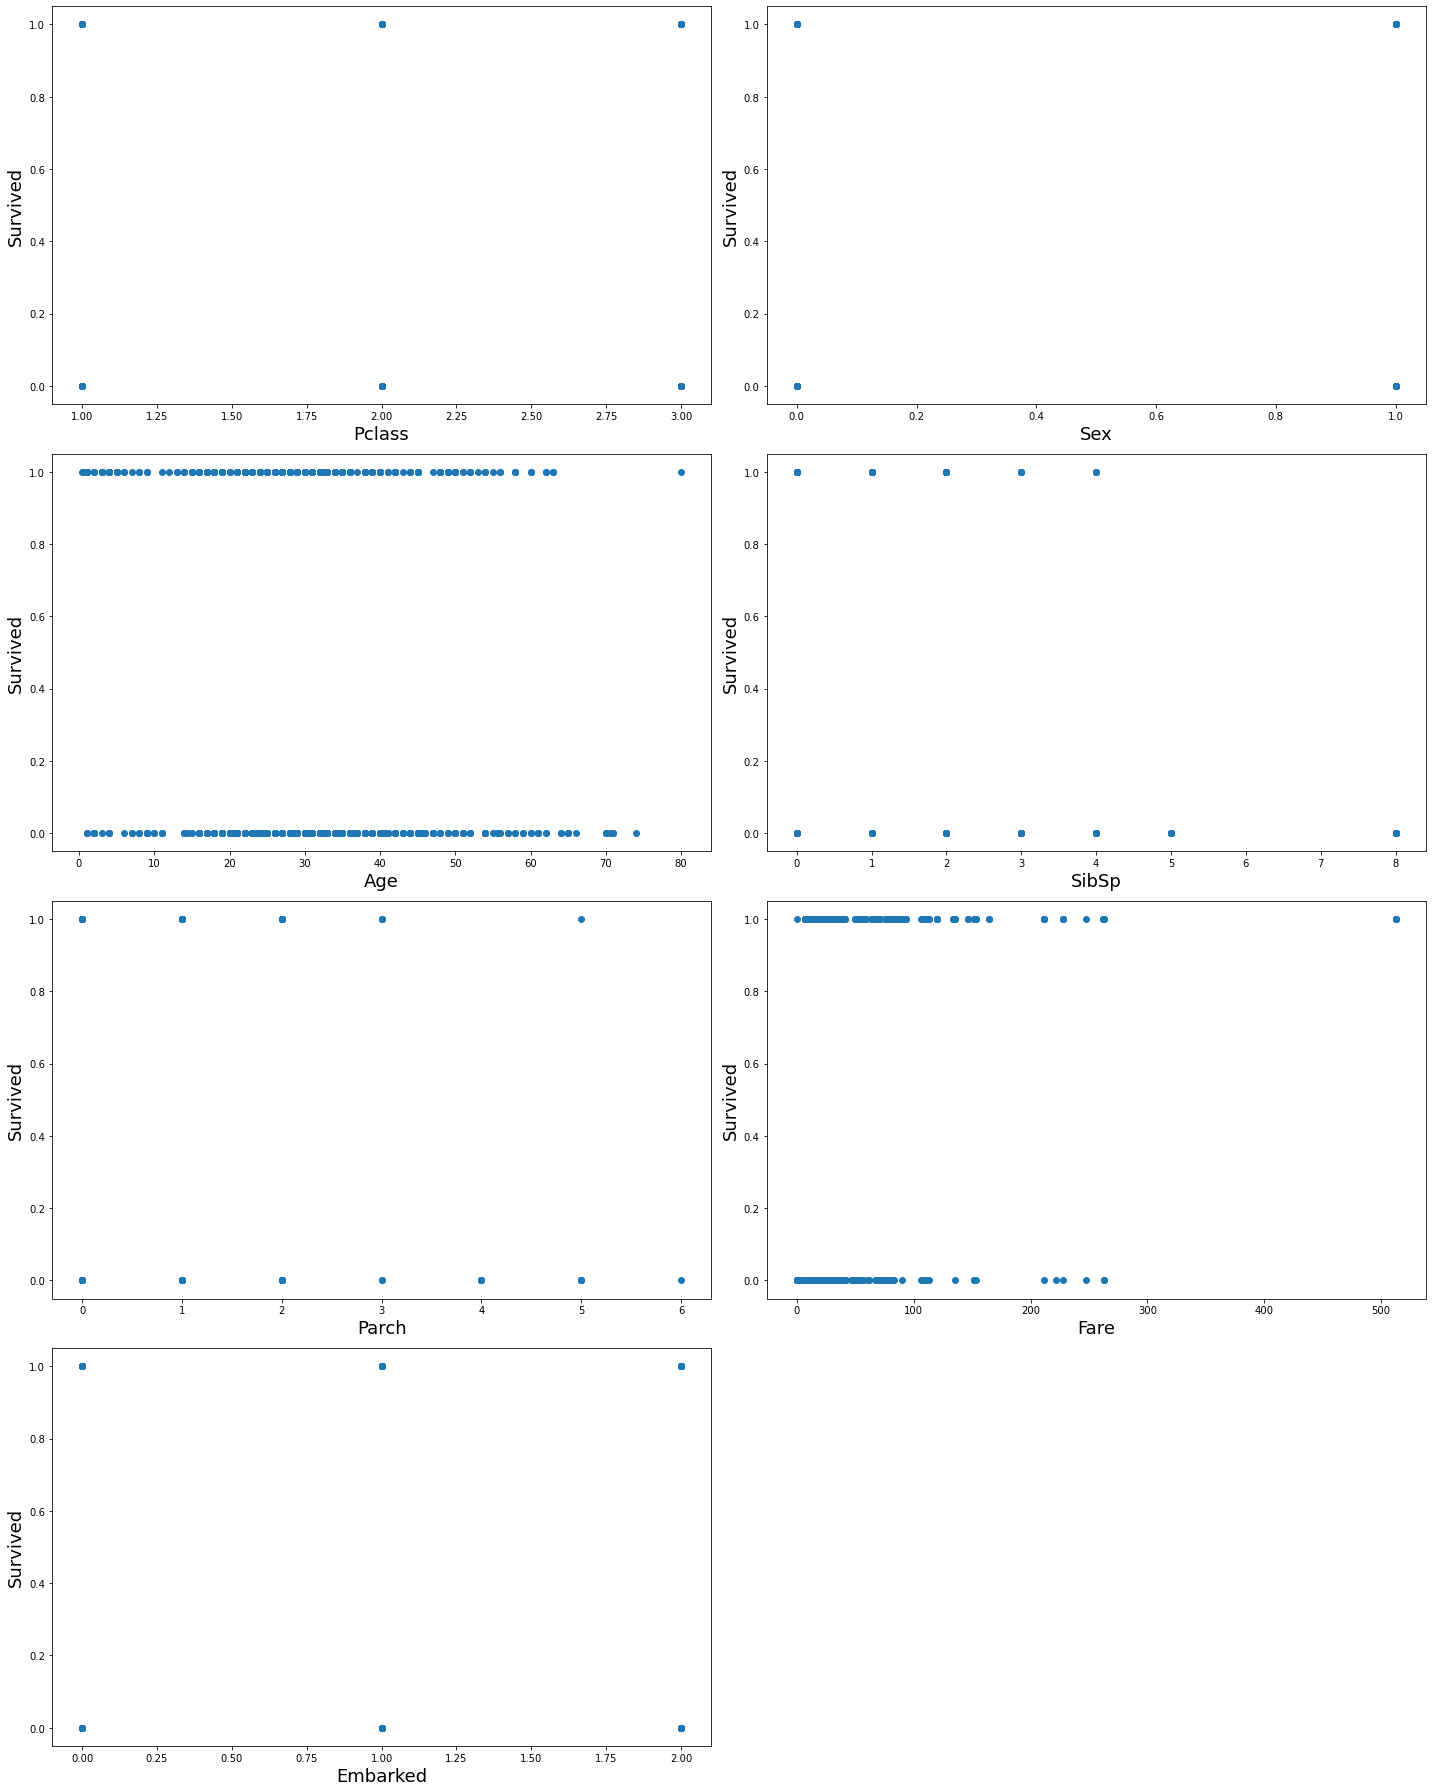

In [33]:
# Let' see relation between features and labels.
print('------------------------')
print('Distribution Plot :-')
print('------------------------')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=8:
        ax = plt.subplot(4,2, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Survived', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color = green>Features are related to class

### <font color = blue>Checking skewnessm

In [34]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

#### <font color= green>Some feature has skewed

### <font color = blue> Data Scaling

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.47367361,
        -0.49237783, -0.67817453]])

### <font color = blue>Split data into train and test. Model will be bulit on training data and tested on test data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = blue>Model Building

### <font color = blue>Logistic Regression model instantiaing, training and evaluating

In [37]:
Lr = LogisticRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [38]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[117  28]
 [ 24  54]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       145
           1       0.66      0.69      0.68        78

    accuracy                           0.77       223
   macro avg       0.74      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

------------------------------------------------------------


### <font color = green>Conclusion : Logistic Regression model has 77% score

### <font color = blue> Cross Validation score to check if the model is overfitting

In [39]:
cv = cross_val_score(Lr, x, y, cv = 5)
print('Cross Validation score of Logistic Regression model --->', cv.mean())

Cross Validation score of Logistic Regression model ---> 0.7890025735986442


### <font color = green>Conclusion : Logistic Regression model has 78% Cross Validation score 

### <font color = blue> ROC, AUC Curve

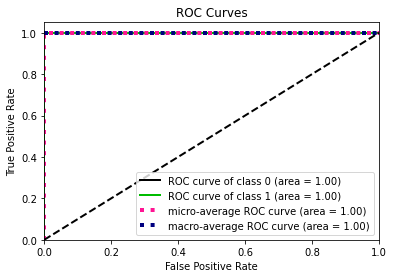

In [40]:
prob = Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### <font color = blue>Decision Tree model instantiaing, training and evaluating

In [41]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [42]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[106  39]
 [ 23  55]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       145
           1       0.59      0.71      0.64        78

    accuracy                           0.72       223
   macro avg       0.70      0.72      0.71       223
weighted avg       0.74      0.72      0.73       223

------------------------------------------------------------


### <font color = green>Conclusion : Decision Tree model has 72% score .

### <font color = blue> Cross Validation score to check if the model is overfitting 

In [43]:
cv = cross_val_score(DT, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.7822923859142553


### <font color = green>Conclusion : Decision Tree model has 77% Cross Validation score 

### <font color = blue> ROC, AUC Curve

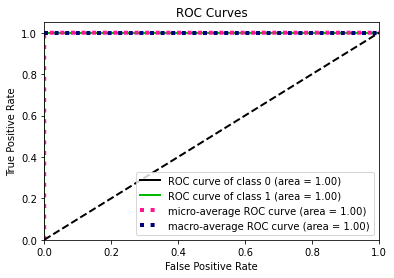

In [44]:
prob = DT.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### <font color = blue>Knn model instantiaing, training and evaluating

In [45]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [46]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[110  35]
 [ 36  42]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       145
           1       0.55      0.54      0.54        78

    accuracy                           0.68       223
   macro avg       0.65      0.65      0.65       223
weighted avg       0.68      0.68      0.68       223

------------------------------------------------------------


### <font color = green>Conclusion : Knn model has 68% score

### <font color = blue> Cross Validation score to check if the model is overfitting

In [47]:
cv = cross_val_score(Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.6947649237336011


### <font color = green>Conclusion : Knn model has 69% Cross Validation score

### <font color = blue> ROC, AUC Curve

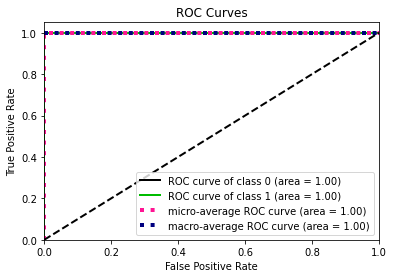

In [48]:
prob = Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### <font color = blue>Random Forest model instantiaing, training and evaluating

In [49]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [50]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[111  34]
 [ 24  54]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       145
           1       0.61      0.69      0.65        78

    accuracy                           0.74       223
   macro avg       0.72      0.73      0.72       223
weighted avg       0.75      0.74      0.74       223

------------------------------------------------------------


### <font color = green>Conclusion : Random Forest model has 75% score

### <font color = blue> Cross Validation score to check if the model is overfitting 

In [51]:
cv = cross_val_score(Rn, x, y, cv = 5)
print('Cross Validation score of Random Forest model --->', cv.mean())

Cross Validation score of Random Forest model ---> 0.807005209967987


### <font color = green>Conclusion : Random Forest model has 80% Cross Validation score .

### <font color = blue> ROC, AUC Curve

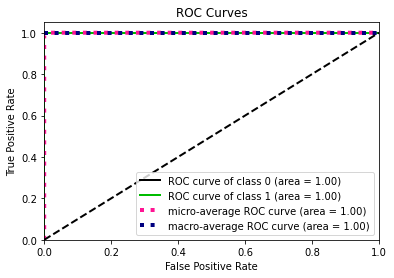

In [52]:
prob = Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### <font color = blue>SVM model instantiaing, training and evaluating

In [53]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [54]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[126  19]
 [ 57  21]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       145
           1       0.53      0.27      0.36        78

    accuracy                           0.66       223
   macro avg       0.61      0.57      0.56       223
weighted avg       0.63      0.66      0.62       223

------------------------------------------------------------


### <font color = green>Conclusion : SVM model has 66% score

### <font color = blue> Cross Validation score to check if the model is overfitting

In [55]:
cv = cross_val_score(svc, x, y, cv = 5)
print('Cross Validation score of svc model --->', cv.mean())

Cross Validation score of svc model ---> 0.674615529470843


### <font color = green>Conclusion : SVM model has 67% Cross Validation score 

### <font color = blue> ROC, AUC Curve

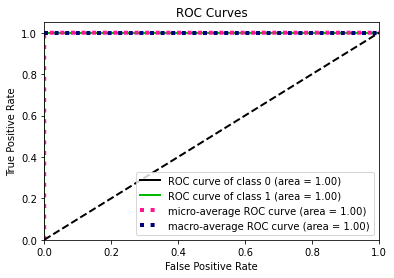

In [56]:
prob = svc.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### <font color = blue>Let's find ROC, AUC score

In [57]:
# LogisticRegression
roc_auc_score(y_test, Lr.predict(x_test))

0.7496021220159151

In [58]:
# DecisionTreeClassifier
roc_auc_score(y_test, DT.predict(x_test))

0.718081343943413

In [59]:
# RandomForestClassifier
roc_auc_score(y_test, Rn.predict(x_test))

0.7289124668435013

In [60]:
# KNeighborsClassifier
roc_auc_score(y_test, Knn.predict(x_test))

0.6485411140583554

In [61]:
# SVMClassifier
roc_auc_score(y_test, svc.predict(x_test))

0.5690981432360742

### <font color = blue>Let's check ROC, AUC Curve for the fitted model

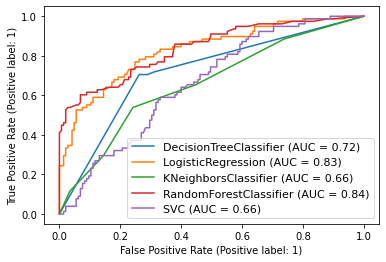

In [62]:
disp = plot_roc_curve(DT, x_test, y_test)
plot_roc_curve(Lr, x_test, y_test, ax = disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(Knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(Rn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

### <font color = blue>Looking CV score we found Logistic Regression has best model so we do Hyperparameter Tuning on it.

In [63]:
param = { 'max_iter':[100],'penalty': ['l1','l2'],'fit_intercept':[True,False]}

In [64]:
grid_search = GridSearchCV(estimator = Lr, param_grid = param, cv = 5,n_jobs = -1 )

In [65]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False], 'max_iter': [100],
                         'penalty': ['l1', 'l2']})

In [66]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2'}


In [67]:
hlr = LogisticRegression(max_iter = 100, penalty = 'l2')
hlr.fit(x_train, y_train)
hlr.score(x_test, y_test)

0.7668161434977578

In [68]:
y_pred = hlr.predict(x_test)

In [69]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[117  28]
 [ 24  54]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       145
           1       0.66      0.69      0.68        78

    accuracy                           0.77       223
   macro avg       0.74      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

------------------------------------------------------------


### <font color = green>After Hyperparameter Tuning model accuracy score 77% 

## <font color = blue>Saving The Model

In [70]:
# saving the model to the Local file system
filename = 'Titanic project.pickle'
pickle.dump(hlr, open(filename, 'wb'))

## <font color = green>Final Conclusion : Logistic Regression is our best model.